# **Business Problem**

In recent years, City Hotel and Resort Hotel have experienced high cancellation rates. As a result, both hotels are facing several challenges, including reduced revenue and suboptimal room utilization. Therefore, lowering cancellation rates has become a primary objective for both hotels in order to enhance efficiency and maximize revenue generation.

**This report focuses on the analysis of hotel booking cancellations as well as other factors that influence business performance and annual revenue generation**.



# **About the Dataset**

The dataset comprises **119.390 hotel bookings** from two types of hotels: a City Hotel and a Resort Hotel. Each entry corresponds to a single booking made between **July 1, 2015 and August 31, 2017**, **including reservations that were completed and those that were canceled**. The data originates from the study Hotel Booking Demand Datasets by Nuno Antonio, Ana Almeida, and Luis Nunes, published in Data in Brief, Volume 22, February 2019. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data).

The dataset provides detailed information on each booking, including:


*   **hotel**: Indicates whether the booking was for a City Hotel or a Resort Hotel.
*   **is_canceled**: Shows whether the booking was canceled (1) or not (0).
*   **lead_time**: Number of days between booking date and arrival date.
*   **arrival_date_week_number**, **arrival_date_day_of_month**, **arrival_date_month**: Week number, day date, and month number of arrival date.
*   **stays_in_weekend_nights**, **stays_in_week_nights**: Total nights the customer booked for weekends (Saturday and Sunday) and weekdays (Monday to Friday).
*   **adults**, **children**, **babies**: Number of adults, children, babies booked for the stay.
*   **meal**: BB – Bed & Breakfast.
*   **country**: Guest's country of origin
*   **market_segment**: Booking market segment, where 'TA' represents Travel Agents and 'TO' represents Tour Operators.
*   **distribution_channel**: Booking distribution channel, with 'TA' for Travel Agents and 'TO' for Tour Operators.
*   **is_repeated_guest**: Binary value indicating if the booking name was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous bookings that the customer canceled before the current booking.  
* **previous_bookings_not_canceled**: Number of previous bookings made by the customer that were not canceled prior to the current booking.  
* **reserved_room_type**: Code representing the type of room reserved. Codes are used instead of names for privacy reasons.  
* **assigned_room_type**: Code for the room type actually assigned. This may differ from the reserved room type due to operational reasons (e.g., overbooking) or customer requests. Codes are anonymized.  
* **booking_changes**: Total number of amendments or modifications made to the booking.  
* **deposit_type**: Type of deposit associated with the booking:
  * `No Deposit` – no deposit was paid.
  * `Non Refund` – full-stay deposit paid, non-refundable.
  * `Refundable` – partial deposit paid, refundable.  
* **agent**: ID of the travel agency responsible for making the booking.  
* **company**: ID of the company responsible for the booking payment. IDs are anonymized.  
* **days_in_waiting_list**: Number of days the booking remained on the waiting list before confirmation.  
* **customer_type**: Type of customer for the booking:
  * `Group` – booking associated with a group.
  * `Transient` – individual booking not associated with a group or contract.
  * `Transient-party` – individual booking associated with at least one other transient booking.  
* **adr**: Average Daily Rate, calculated by dividing total lodging revenue by the total number of nights stayed.  
* **required_car_parking_spaces**: Number of car parking spaces requested by the customer.  
* **total_of_special_requests**: Number of special requests made by the customer (e.g., twin bed, high floor).  
* **reservation_status**: Final booking status:
  * `Check-Out` – customer checked in and has departed.
  * `No-Show` – customer did not check in and informed the hotel of the absence.  
* **reservation_status_date**: Date when the final booking status was recorded. This can be used alongside **reservation_status** to determine when a booking was canceled or when a customer checked out.















# **Assumptions**



1.   No unusual occurrences between 2015 and 2017 have had a substantial impact on the data used.
2.   The information remains relevant and can be applied to efficiently analyze potential hotel strategies.
3.   There are no unforeseen negative consequences for the hotels in implementing any of the recommended techniques.
4.   The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is bookig cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.





# **Research Question**



1.   What variables affect hotel reservation cancellations?
2.   How can hotel reservation cancellations be reduced?
2.   How can hotels be supported in making pricing and promotional decisions?



# **Hypothesis**



1.   More cancellations occur when prices are higher.
2.   When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.



# **Code Implementation**

##**Import Libraries**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


## **Load the Dataset**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/hotel_booking.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploratory Data Analysis and Data Cleaning**

In [33]:
# Display the first five rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [34]:
# Display the last five rows of the dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [35]:
# Display the number of rows and columns in the dataset
df.shape

(119390, 36)

In [36]:
# Display the list of all column names in the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

Based on the code above, it can be seen that the dataset contains119.390 rows and 32 columns. Since this dataset **contains real hotel data**, **all elements related to hotel or customer identification should be removed**. Therefore, the columns 'name', 'email', 'phone number', and 'credit_card' have been excluded.

In [37]:
# Remove unnecessary identification columns
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [38]:
# Display a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The column **reservation_status_date is still stored in object format** because when the data was imported, the dates were read as text. **This format does not support time-based analysis**, so it **needs to be converted to datetime**.

In [39]:
# Change 'reservation_status_date' to datetime format to enable time-based analysis
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [40]:
# Describe object (categorical) columns
print("\nSummary Statistics for Categorical Columns:")
display(df.describe(include='object'))


Summary Statistics for Categorical Columns:


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [41]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('`'*50)

hotel
['Resort Hotel' 'City Hotel']
``````````````````````````````````````````````````
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
``````````````````````````````````````````````````
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
``````````````````````````````````````````````````
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

The purpose of the code above is to review all categorical columns and display all unique values in each, providing further information beyond the summary statistics, which previously only showed the number of unique values and the most frequent category (top) for each categorical column.

## **Data Pre-Processing**

### **Checking and Handling Missing Values**

In [42]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())
print()

Missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

Some columns in the dataset contain missing values with varying amounts. The **children** column has 4 missing entries, **country** has 488, **agent** has 16.340, and **company** has 112.593, while all other columns have no missing values.

In [43]:
# Remove columns with too many missing values
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

**The company and agent columns** were removed not only due to a high number of missing values but also because they are **considered to have low relevance**, providing little meaningful insight into booking cancellation patterns or customer behavior.

In [44]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [45]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())


Summary statistics for numerical columns:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


### **Checking and Handling Outlier**

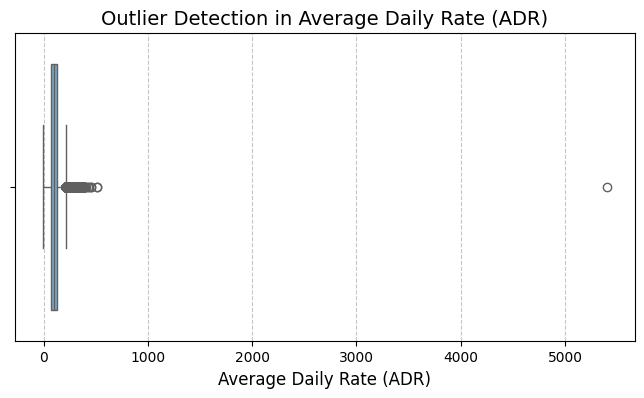

In [46]:
# Outlier detection for 'adr' (Average Daily Rate)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['adr'], color=sns.color_palette("Blues", 1)[0])
plt.title('Outlier Detection in Average Daily Rate (ADR)', fontsize=14)
plt.xlabel('Average Daily Rate (ADR)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

From the visualization above, it can be seen that outliers are present at very high ADR values, far above the majority of the data distribution. Therefore, to maintain data cleanliness and consistency, all rows where `adr ≥ 5000` were removed. This decision ensures that the analysis and models are more representative of typical customer behavior while reducing the impact of atypical extreme values.

In [47]:
# Remove extreme outliers in 'adr'
df = df[df['adr'] < 5000]

## **Data Analysis and Visualization**

This section focuses on examining the cleaned hotel booking dataset to identify important patterns and insights, using visualizations to present the results clearly and effectively.


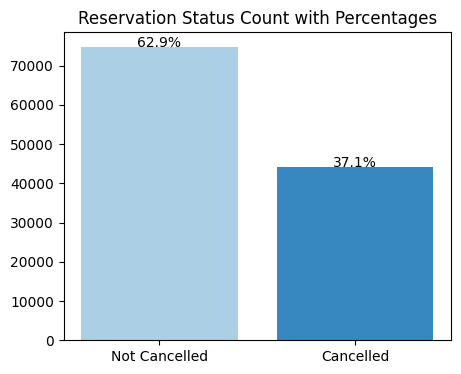

In [48]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True) * 100
palette = sns.color_palette("Blues", 2)

plt.figure(figsize=(5, 4))
bars = plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), color=palette)
plt.title('Reservation Status Count with Percentages')

for bar, perc in zip(bars, cancelled_perc):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, f'{perc:.1f}%', ha='center', fontsize=10)

plt.show()

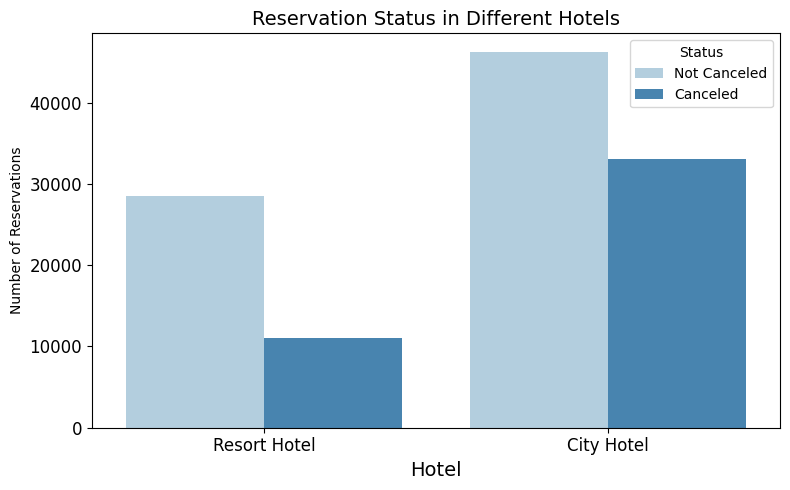

In [49]:
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette=sns.color_palette("Blues", 2)
)

plt.title('Reservation Status in Different Hotels', fontsize=14)
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Not Canceled', 'Canceled'], title='Status', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [50]:
# Calculate cancellation rate for Resort Hotel
resort_cancelled_perc = df[df['hotel'] == "Resort Hotel"]['is_canceled'].value_counts(normalize=True) * 100
print("Resort Hotel - Reservation Status (%):")
print(resort_cancelled_perc)
print('-'*40)

Resort Hotel - Reservation Status (%):
is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64
----------------------------------------


In [51]:
# Calculate cancellation rate for City Hotel
city_cancelled_perc = df[df['hotel'] == "City Hotel"]['is_canceled'].value_counts(normalize=True) * 100
print("City Hotel - Reservation Status (%):")
print(city_cancelled_perc)
print('-'*40)


City Hotel - Reservation Status (%):
is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64
----------------------------------------


In [52]:
# Create separate DataFrames for each hotel to enable grouping by reservation date
resort_hotel_df = df[df['hotel'] == "Resort Hotel"].copy()
city_hotel_df = df[df['hotel'] == "City Hotel"].copy()

# Then calculate the average daily rate (ADR) for each reservation date
resort_hotel_adr = resort_hotel_df.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel_df.groupby('reservation_status_date')[['adr']].mean()

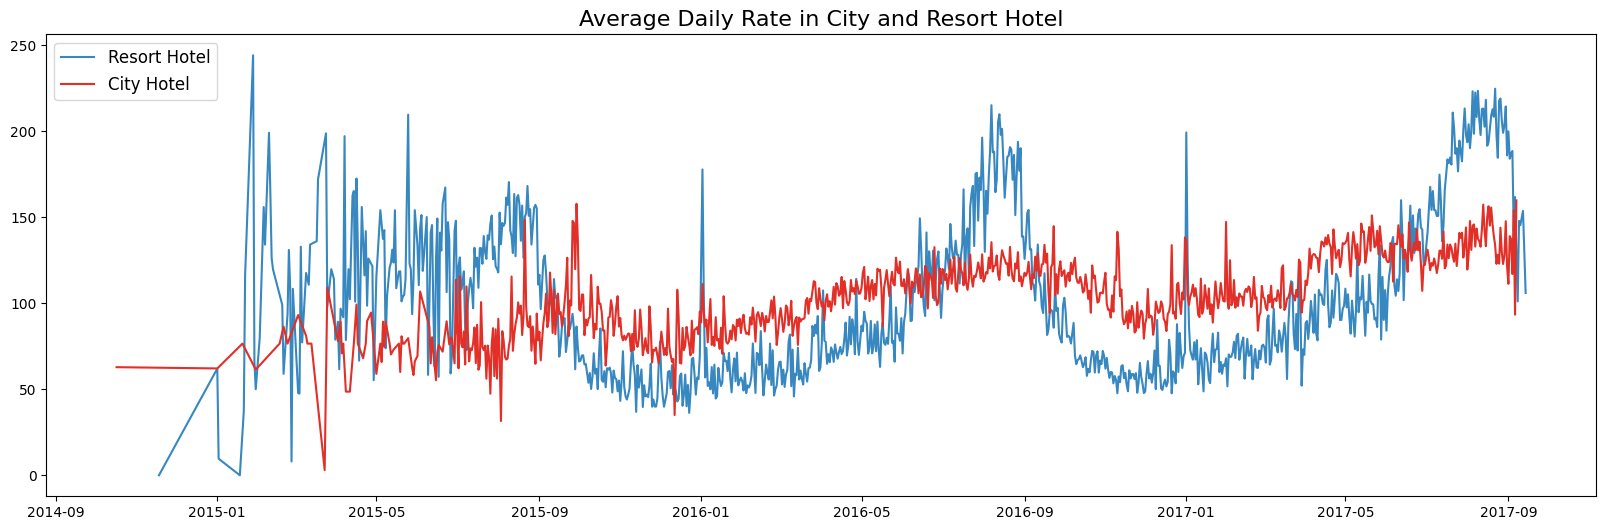

In [53]:
colors = sns.color_palette("Blues_d", 1) + sns.color_palette("Reds_d", 1)

plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=16)
plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel', color=colors[1])
plt.legend(fontsize=12)
plt.show()

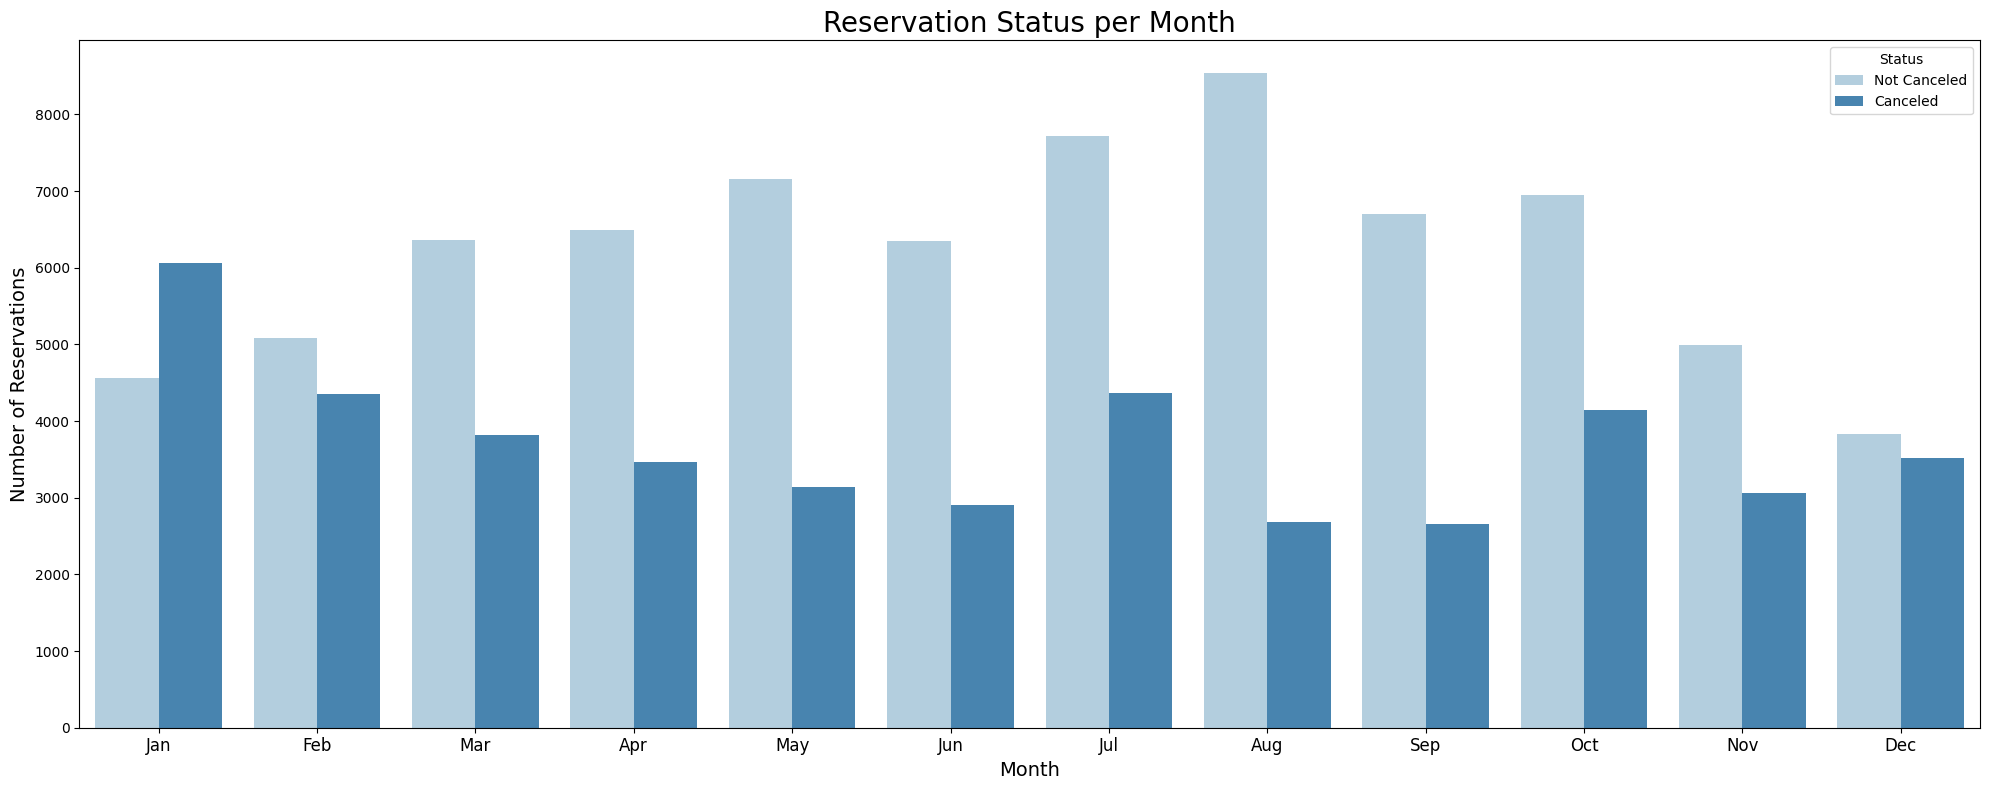

In [54]:
import calendar

df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(20,8))
ax = sns.countplot(
    x='month',
    hue='is_canceled',
    data=df,
    palette='Blues'
)

ax.set_title('Reservation Status per Month', fontsize=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Reservations', fontsize=14)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Not Canceled', 'Canceled'], title='Status')

ax.set_xticklabels([calendar.month_abbr[m] for m in sorted(df['month'].unique())], fontsize=12)

plt.tight_layout()
plt.show()

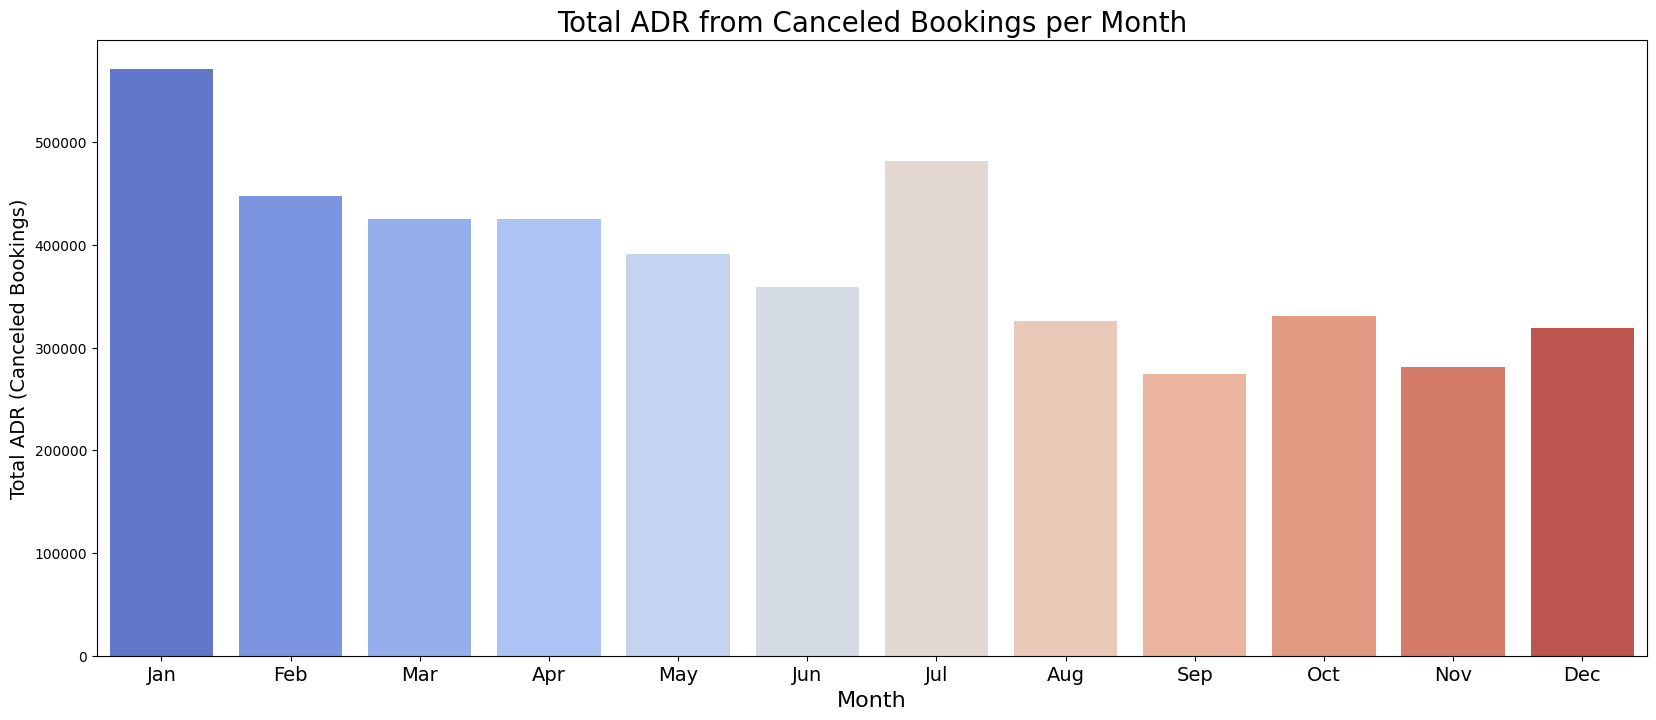

In [55]:
monthly_adr_canceled = df[df['is_canceled']==1].groupby(df['reservation_status_date'].dt.month)['adr'].sum().reset_index()
monthly_adr_canceled.rename(columns={'reservation_status_date':'month'}, inplace=True)

plt.figure(figsize=(20,8))
sns.barplot(x='month', y='adr', data=monthly_adr_canceled, palette='coolwarm')
plt.title('Total ADR from Canceled Bookings per Month', fontsize=20)
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[m] for m in range(1,13)], fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total ADR (Canceled Bookings)', fontsize=14)
plt.show()

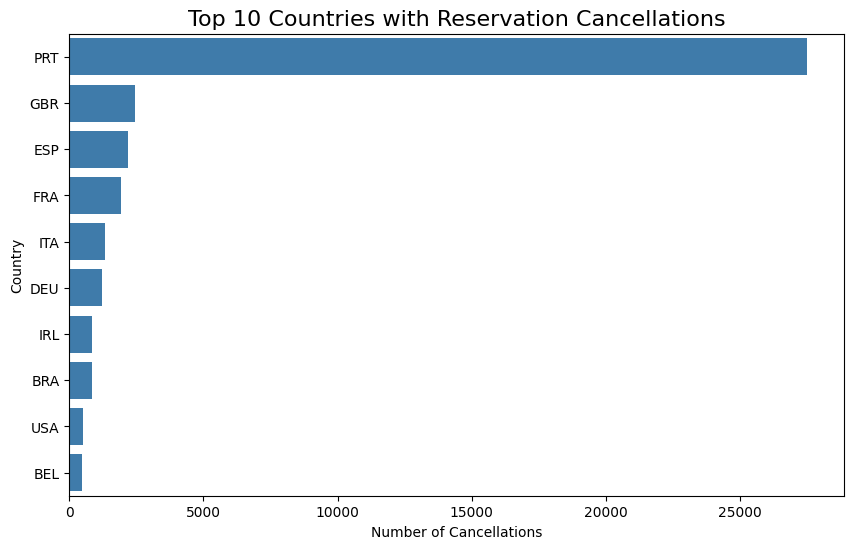

In [56]:
top_10_country = df[df['is_canceled']==1]['country'].value_counts().head(10)
dark_blue = sns.color_palette("Blues", 9)[-3]

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_country.values, y=top_10_country.index, color=dark_blue)
plt.title("Top 10 Countries with Reservation Cancellations", fontsize=16)
plt.xlabel("Number of Cancellations")
plt.ylabel("Country")
plt.show()

In [57]:
# Count the number of reservations for each market segment
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [58]:
# Calculate the proportion of reservations for each market segment
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


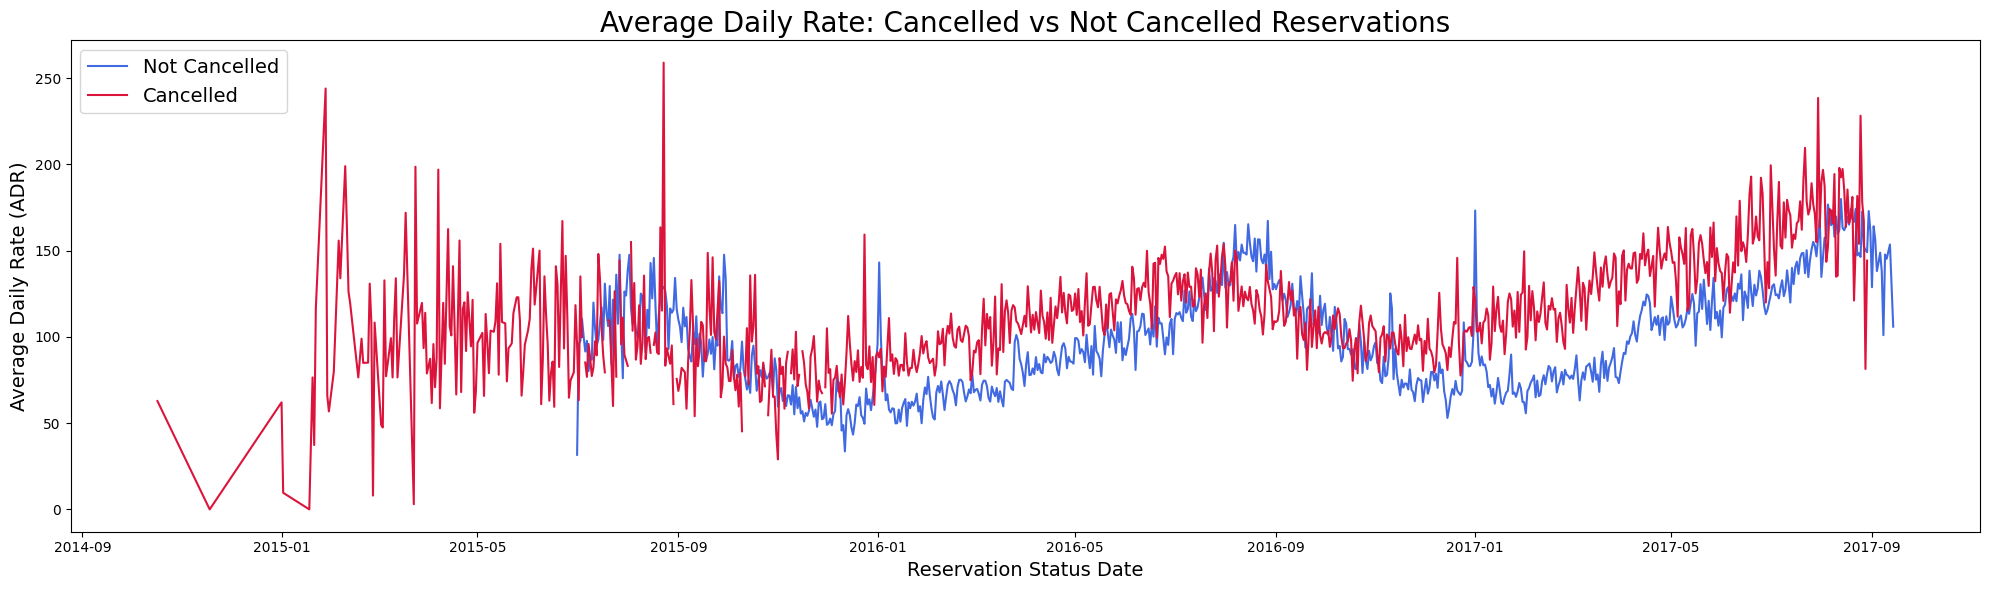

In [59]:
# Compute average daily rate (ADR) per date for each cancellation status
adr_time = df.groupby(['reservation_status_date', 'is_canceled'])['adr'].mean().unstack()

plt.figure(figsize=(20,6))
plt.plot(adr_time.index, adr_time[0], label='Not Cancelled', color='royalblue')  # ADR for not cancelled reservations
plt.plot(adr_time.index, adr_time[1], label='Cancelled', color='crimson')       # ADR for cancelled reservations
plt.title('Average Daily Rate: Cancelled vs Not Cancelled Reservations', fontsize=20, color='black')
plt.xlabel('Reservation Status Date', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

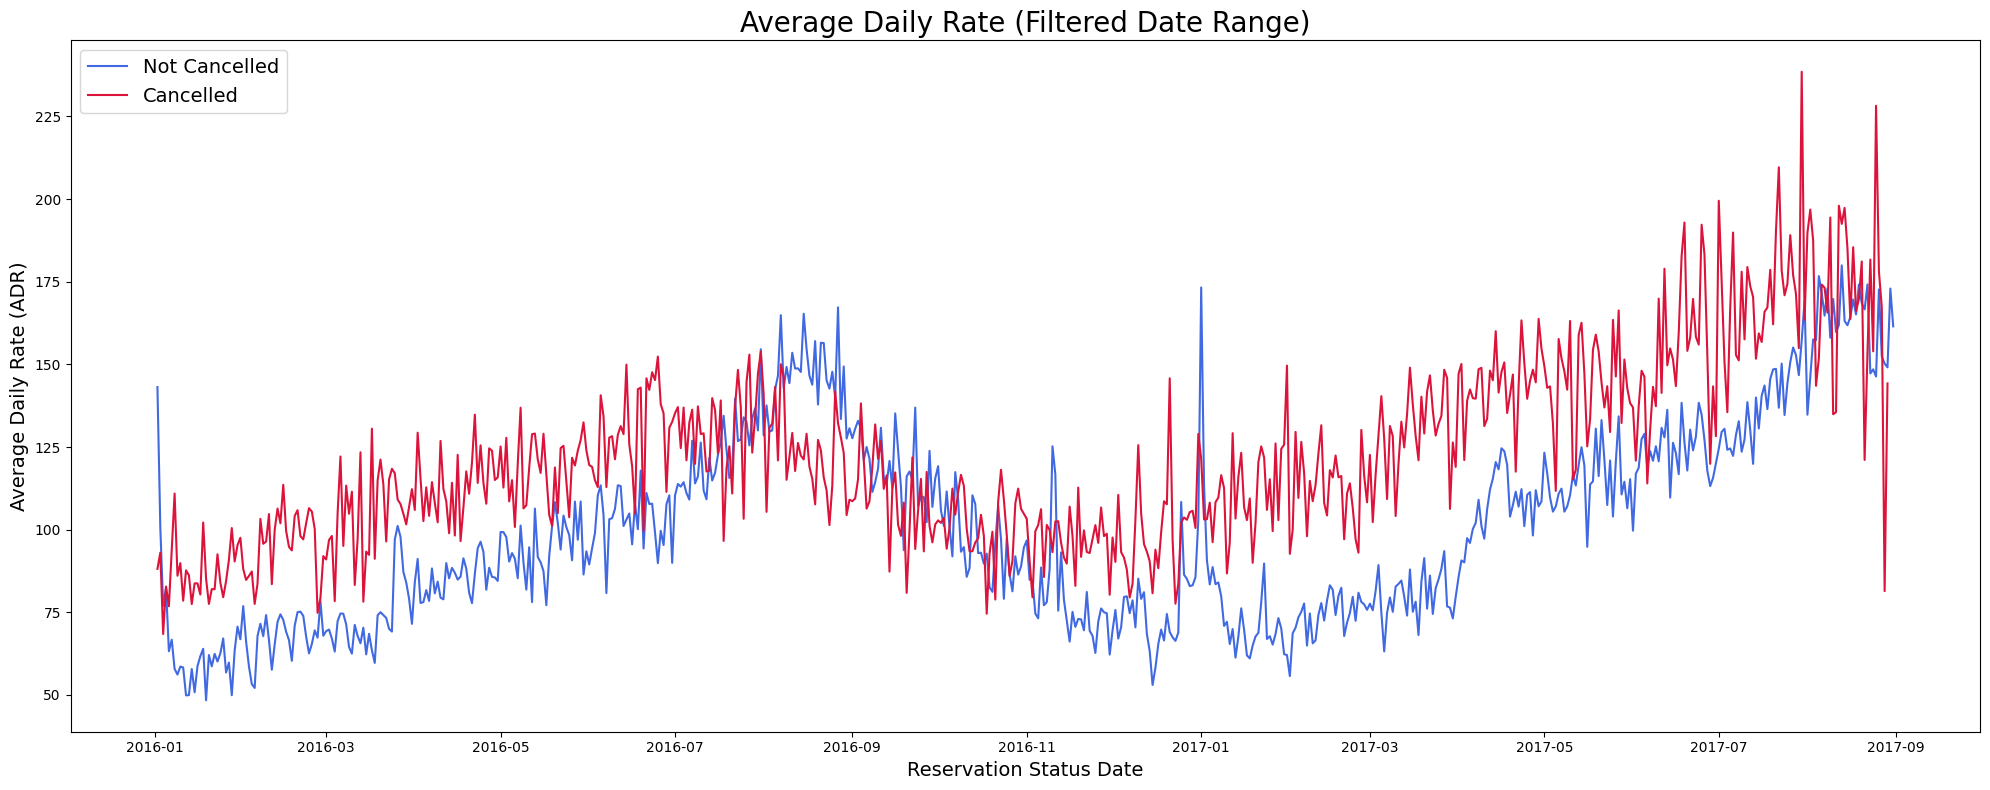

In [60]:
# Filter data for cancelled and not cancelled reservations within the date range
adr_filtered = df[(df['reservation_status_date'] > '2016-01-01') &
                  (df['reservation_status_date'] < '2017-09-01')]

# Compute average daily rate (ADR) per date for each cancellation status
adr_time = adr_filtered.groupby(['reservation_status_date', 'is_canceled'])['adr'].mean().unstack()

plt.figure(figsize=(20,8))
plt.plot(adr_time.index, adr_time[0], label='Not Cancelled', color='royalblue')  # ADR for not cancelled
plt.plot(adr_time.index, adr_time[1], label='Cancelled', color='crimson')       # ADR for cancelled
plt.title('Average Daily Rate (Filtered Date Range)', fontsize=20)
plt.xlabel('Reservation Status Date', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()